Final Accuracy  0.9209


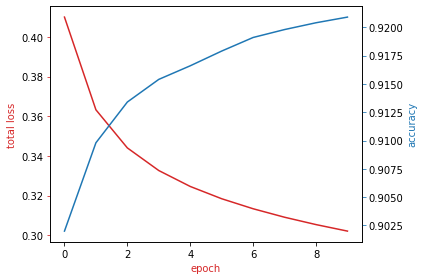

In [10]:
import torch
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

def show_data(data):
  plt.imshow(data[0].numpy().reshape(28,28),cmap='gray')
  plt.title('y: ',str(data[1]))


train_data = dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
valid_data = dsets.MNIST(root='./data',train=False, transform= transforms.ToTensor(),download=True)

in_ = 28 * 28
out_ = 10
model = nn.Sequential(nn.Linear(in_,out_))

train_loader = DataLoader(dataset=train_data, batch_size=100)
valid_loader = DataLoader(dataset=valid_data, batch_size=5000)

optimizer = optim.SGD(model.parameters(),lr=0.1)
criterion = nn.CrossEntropyLoss()
LOSS=[]
ACC=[]

def train_model(iter):
  for epoch in range(iter):

    for x,y in train_loader:
      z = model(x.view(-1,in_))
      loss=criterion(z,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    correct=0

    for x,y in valid_loader:
      z = model(x.view(-1,in_))
      _, yhat = torch.max(z,1)
      correct += (yhat==y).sum().item()
    accuracy = correct/len(valid_data)
    LOSS.append(loss.data)
    ACC.append(accuracy)



train_model(10)

# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(LOSS, color = color)
ax1.set_xlabel('epoch', color = color)
ax1.set_ylabel('total loss', color = color)
ax1.tick_params(axis = 'y', color = color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color = color)  
ax2.plot( ACC, color = color)
ax2.tick_params(axis = 'y', color = color)
fig.tight_layout()

correct = 0
for x,y in valid_data:
  z = model(x.view(-1,in_))
  _, yhat = z.max(1)
  correct += (yhat==y).sum().item()

accuracy = correct/len(valid_data)

print('Final Accuracy ',accuracy)
